<a href="https://colab.research.google.com/github/komalsuryan/GitWorkshop/blob/master/PersistanceForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
#df1 = pd.read_csv(url)
series = read_csv(url, header=0, index_col=0, parse_dates=True, squeeze=True)
series.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


Month
1960-01-01     6550
1960-02-01     8728
1960-03-01    12026
1960-04-01    14395
1960-05-01    14587
Name: Sales, dtype: int64

In [56]:
series.describe(include="all")

count      108.000000
mean     14595.111111
std       4525.213913
min       5568.000000
25%      11391.250000
50%      14076.000000
75%      17595.750000
max      26099.000000
Name: Sales, dtype: float64

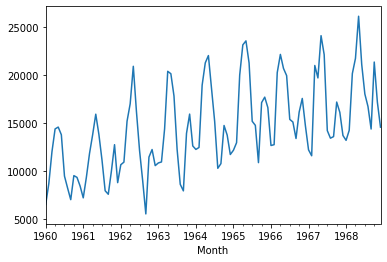

In [57]:
from pandas import read_csv
from matplotlib import pyplot as plt
series.plot()
pyplot.show()

In [60]:
from pandas import DataFrame
# Create lagged dataset
values = DataFrame(series.values)
DataFrame = concat([values.shift(1), values], axis=1)
DataFrame.columns = ['t-1', 't+1']
print(DataFrame.head(5))

       t-1    t+1
0      NaN   6550
1   6550.0   8728
2   8728.0  12026
3  12026.0  14395
4  14395.0  14587


In [62]:

# split into train and test sets
X = DataFrame.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [63]:

# persistence model
def model_persistence(x):
	return x

In [64]:

# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 13356460.486


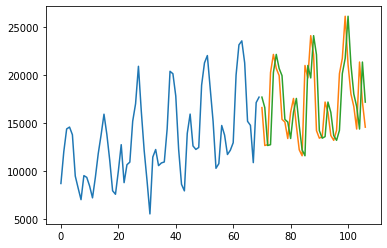

In [65]:
# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()